# Solving TicTacToe with Minimax

## Imports

In [61]:
import random
import numpy as np
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
from tqdm import tqdm
import tkinter as tk
from tkinter import messagebox

## Helper Functions

In [62]:
max_optimal_next_states = {}
min_optimal_next_states = {}

In [63]:
def produce_children(state):
    "Function to produce children of a state"
    return children.get(state,None)

def is_terminal(state):
    "Function to check if a state is terminal and return value of the state"
    if state in children:
        return False,0
    return True,value[state]

def get_action(next_state,current_state=None): 
    "Function to determine action that moves from current state to next state"
    #current state is redundant for this example as there is only one way to get to a state
    "Function to return action that moves player from current state to next state"
    return action[next_state]

def maximize(state):
    
    if state in max_optimal_next_states:
        return max_optimal_next_states[state]
    
    terminal_status,reward = is_terminal(state)
    if terminal_status:
        return state,reward # No further state so return same state
    
    max_state, max_score = None,-np.inf
    max_states = []
    children = produce_children(state)
    for child in children:
        _,score = minimize(child)
        if score > max_score:
            max_state,max_score = child,score
            max_states = [max_state]
        elif score == max_score: 
            max_states.append(child)
            
    # If multiple actions are optimal, break ties randomly
    max_state = random.choice(max_states)
    max_optimal_next_states[state] = (max_state,max_score)
    
    return max_state,max_score


In [64]:
def minimize(state):
    
    if state in min_optimal_next_states:
        return min_optimal_next_states[state]
    
    terminal_status,reward = is_terminal(state)
    if terminal_status:
        return state,reward # No further state so return same state
    
    min_state, min_score = None,np.inf
    min_states = []
    children = produce_children(state)
    for child in children:
        _,score = maximize(child)
        if score < min_score:
            min_state,min_score = child,score
            min_states = [min_state]
        elif score == min_score: 
            min_states.append(child)
    
    min_state = random.choice(min_states)
    min_optimal_next_states[state] =  (min_state,min_score)
    
    return min_state,min_score

In [65]:
def optimal_decision(state,player = 'Maximizer'):
    if player == 'Maximizer':
        max_state,_ = maximize(state)
        return get_action(max_state,state)
    else:
        min_state,_ = minimize(state)
        return get_action(min_state,state)

Let us denote player 'X' who plays first using 1 and player 'O' who plays second using 2. An empty square will be represented with 0.

In [66]:
s_to_b = {0:'__',1:'X',2:'O'} 
state = (1,0,0,2,0,0,0,0,0)

In [67]:
def state_to_board(state):
    '''Function to convert a a state(tuple) to a board(numpy array)'''
    board = np.array([s_to_b[position] for position in state])
    return board.reshape(3,3)
    

The state can be converted to a board using the above function.

In [68]:
state_to_board((1,0,0,2,0,0,0,0,0))

array([['X', '__', '__'],
       ['O', '__', '__'],
       ['__', '__', '__']], dtype='<U2')

A player wins if he or she gets a sequence of 'X's or 'O's.

In [69]:
max_player_wins = (1,1,1)
min_player_wins = (2,2,2)

In [70]:
def is_terminal(state):
    
    if  state[slice(0,3)] == max_player_wins:
        return True,10
    elif state[slice(0,3)] == min_player_wins:
        return True,-10
    elif state[slice(3,6)] == max_player_wins:
        return True,10
    elif state[slice(3,6)] == min_player_wins:
        return True,-10
    elif state[slice(6,9)] == max_player_wins:
        return True,10
    elif state[slice(6,9)] == min_player_wins:
        return True,-10
    elif state[slice(0,7,3)] == max_player_wins:
        return True,10
    elif state[slice(0,7,3)] == min_player_wins:
        return True,-10
    elif state[slice(1,8,3)] == max_player_wins:
        return True,10
    elif state[slice(1,8,3)] == min_player_wins:
        return True,-10
    elif state[slice(2,9,3)] == max_player_wins:
        return True,10
    elif state[slice(2,9,3)] == min_player_wins:
        return True,-10
    elif state[slice(0,9,4)] == max_player_wins:
        return True,10
    elif state[slice(0,9,4)] == min_player_wins:
        return True,-10
    elif state[slice(2,7,2)] == max_player_wins:
        return True,10
    elif state[slice(2,7,2)] == min_player_wins:
        return True,-10
    elif state.count(0) == 0:
        return True,0
    else:
        return False,0
        

We now define a function to produce the next set of possible states given a state.

In [71]:
from copy import deepcopy
def produce_children(state):
    l = list(state)
    children = []
    vacant_slots = [i for i,v in enumerate(state) if v == 0]
    if state.count(0) % 2 == 1: #If number of vacant spaces is odd , then it is max_player's turn
        for slot in vacant_slots:
            child = deepcopy(l)
            child[slot] = 1
            children.append(tuple(child))
    else: #if number of vacant spaces is even then it is min_player's turn.
        for slot in vacant_slots:
            child = deepcopy(l)
            child[slot] = 2
            children.append(tuple(child))
    
    return children

In [72]:
children = produce_children(state)
children

[(1, 1, 0, 2, 0, 0, 0, 0, 0),
 (1, 0, 1, 2, 0, 0, 0, 0, 0),
 (1, 0, 0, 2, 1, 0, 0, 0, 0),
 (1, 0, 0, 2, 0, 1, 0, 0, 0),
 (1, 0, 0, 2, 0, 0, 1, 0, 0),
 (1, 0, 0, 2, 0, 0, 0, 1, 0),
 (1, 0, 0, 2, 0, 0, 0, 0, 1)]

These correspond to the following states.

In [73]:
for child in children:
    print(state_to_board(child),'\n')

[['X' 'X' '__']
 ['O' '__' '__']
 ['__' '__' '__']] 

[['X' '__' 'X']
 ['O' '__' '__']
 ['__' '__' '__']] 

[['X' '__' '__']
 ['O' 'X' '__']
 ['__' '__' '__']] 

[['X' '__' '__']
 ['O' '__' 'X']
 ['__' '__' '__']] 

[['X' '__' '__']
 ['O' '__' '__']
 ['X' '__' '__']] 

[['X' '__' '__']
 ['O' '__' '__']
 ['__' 'X' '__']] 

[['X' '__' '__']
 ['O' '__' '__']
 ['__' '__' 'X']] 



Finally we define a function to return the action  that leads from the current state to the next state.

In [74]:
def difference(tuple1,tuple2):
    "Helper function to get the index where first difference between two tuples is observed"
    assert len(tuple1) == len(tuple2)
    for i,value in enumerate(tuple1):
        if value != tuple2[i]:
            return i
    return None
    
def get_action(next_state,current_state):
    return difference(next_state,current_state),next_state
    

We can now evaluate whether we can solve the mini tic-tac-toe problem above with the tools at hand.The starting state of the game is given by

In [75]:
state = (1,2,1,0,0,2,0,2,1)
state_to_board(state)

array([['X', 'O', 'X'],
       ['__', '__', 'O'],
       ['__', 'O', 'X']], dtype='<U2')

In [76]:
optimal_action,optimal_next_state = optimal_decision(state,player = 'Maximizer')
optimal_action,state_to_board(optimal_next_state)

(4,
 array([['X', 'O', 'X'],
        ['__', 'X', 'O'],
        ['__', 'O', 'X']], dtype='<U2'))

As expected , the algorithm determines the optimal action for player 'X' is to occupy the central square in the board.

Let us consider one more path in the game where player X plays a non-optimal move resulting in the following state.

In [77]:
state = (1,2,1,1,0,2,0,2,1)
state_to_board(state)

array([['X', 'O', 'X'],
       ['X', '__', 'O'],
       ['__', 'O', 'X']], dtype='<U2')

The optimal state of the minimizing player is given by

In [78]:
optimal_action,optimal_next_state = optimal_decision(state,player = 'Minimizer')
optimal_action,state_to_board(optimal_next_state)

(4,
 array([['X', 'O', 'X'],
        ['X', 'O', 'O'],
        ['__', 'O', 'X']], dtype='<U2'))

Now we will analyze the following games

1) Random **X** vs Random **O** <br>
2) Optimal **X** vs Random **O** <br> 
3) Random **X** vs Optimal **O** <br>
4) Optimal **X** vs Optimal **O**

The following function represents a random player who chooses an available slot at random. The maximizer is player **X** while the minimizer is player **O**

In [79]:
def random_decision(state,player = 'Maximizer'):
    vacant_slots = [i for i,v in enumerate(state) if v == 0]
    action = random.choice(vacant_slots)
    state_as_list = list(state)
    #Update state
    if player == 'Maximizer':
        state_as_list[action] = 1
    else:
        state_as_list[action] = 2
        
    return action,tuple(state_as_list)
    

Now we wil define a function to play N games and record the results for analysis

In [80]:
def play_games(n_games:int,X_strategy,O_strategy):
    '''
    n_games: Number of games to be player
    X_strategy: function describing decision making strategy for player X
    O_strategy: function describing decision making strategy for player Y
    '''
    win_stats = defaultdict(int)
    #Dictionary for holding no of wins for games started with a particual move
    move_wins_X = defaultdict(int)
    move_wins_O = defaultdict(int)
    #Dictionary for holding no of games started with a particual move
    move_X = defaultdict(lambda:-1)
    move_O = defaultdict(lambda:-1)
    
    for i in tqdm(range(n_games)):
        random.seed(i)
        state = (0,0,0,0,0,0,0,0,0)
        terminal_status = False
       
        first_move_flag_X = True # Flag identifying first move of player X
        first_move_flag_O = True # Flag identifying first move of player O
        
        
        while not terminal_status:
            #Player X plays;  
            player_x_action,next_state = X_strategy(state,player='Maximizer')
            terminal_status,score = is_terminal(next_state)
            
            if first_move_flag_X:
                first_move_X = player_x_action
                move_X[first_move_X] += 1
                first_move_flag_X = False
            
            #If player X plays last move
            if terminal_status:
                if score == 10: #player X wins
                    win_stats['X_win'] +=1
                    move_wins_X[first_move_X] += 1 #record player's first move
                else:
                    win_stats['Draw'] += 1
                break
            
            state = next_state
            #Player O plays next
            
            player_o_action,next_state = O_strategy(state,player='Minimizer')
            terminal_status,score = is_terminal(next_state)
            
            if first_move_flag_O:
                first_move_O = player_o_action
                move_O[first_move_O] += 1
                first_move_flag_O = False
            
            
            #If player O plays last move
            if terminal_status:
                if score == -10: #player O wins
                    win_stats['O_win'] +=1
                    move_wins_O[first_move_O] += 1 #record player's first move
                else:
                    win_stats['Draw'] += 1
                break
            
            state = next_state    
        
    return win_stats,move_wins_X,move_wins_O,move_X,move_O
    

We also create a helper function to visualize the results.

In [81]:
def plot_results(results):
    win_stats,move_wins_X,move_wins_O,move_X,move_O = results
    win_stats_df = pd.DataFrame({'Category':list(win_stats.keys()),'Count':list(win_stats.values())})
    move_X_win_rate = {i:move_wins_X[i]/move_X[i]  for i in range(9)}
    move_O_win_rate = {i:move_wins_O[i]/move_O[i]  for i in range(9)}
    
    
    move_X_win_rate_array = np.array([move_X_win_rate[x] for x in range(9)]).reshape(3,3)
    move_O_win_rate_array = np.array([move_O_win_rate[x] for x in range(9)]).reshape(3,3)

        
    sns.set(font_scale=2)
    fig, axs = plt.subplots(ncols=3,figsize=(30,10))
    splot = sns.barplot(x="Category",y="Count",data=win_stats_df,ax=axs[0])
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, -12), 
                       textcoords = 'offset points')
    splot.set_title('Distribution of Wins,Losses and Ties')
    
    sns.heatmap(move_X_win_rate_array,annot=True,ax = axs[1]).set_title('Player X:% of wins for first move')
    sns.heatmap(move_O_win_rate_array,annot=True,ax = axs[2]).set_title('Player Y:% of wins for first move')
    

## Demo Game

In [82]:

class TicTacToe:
    def __init__(self, master):
        self.master = master
        self.master.title("Tic Tac Toe")
        self.current_state = (0,) * 9
        self.game_over = False
        self.player_symbol = None
        self.computer_symbol = None

        self.create_widgets()

    def create_widgets(self):
        self.player_selection = tk.Frame(self.master)
        self.player_selection.pack(pady=10)

        tk.Label(self.player_selection, text="Choose your player:").pack(side=tk.LEFT)
        tk.Button(self.player_selection, text="X", command=lambda: self.set_player("X")).pack(side=tk.LEFT, padx=5)
        tk.Button(self.player_selection, text="O", command=lambda: self.set_player("O")).pack(side=tk.LEFT)

        self.board = tk.Frame(self.master)
        self.board.pack()

        self.buttons = []
        for i in range(3):
            for j in range(3):
                button = tk.Button(self.board, text="", font=('normal', 20, 'bold'), width=5, height=2,
                                   command=lambda row=i, col=j: self.on_click(row, col))
                button.grid(row=i, column=j)
                self.buttons.append(button)

    def set_player(self, symbol):
        self.player_symbol = symbol
        self.computer_symbol = "O" if symbol == "X" else "X"
        self.player_selection.destroy()
        if self.computer_symbol == "X":
            self.make_computer_move()

    def on_click(self, row, col):
        if self.game_over or self.player_symbol is None:
            return

        index = 3 * row + col
        if self.current_state[index] == 0:
            self.update_button(index, self.player_symbol)
            if self.check_winner():
                return
            self.make_computer_move()

    def make_computer_move(self):
        computer_move, next_state = self.optimal_decision(self.current_state, 
                                                          "Maximizer" if self.computer_symbol == "X" else "Minimizer")
        self.update_button(computer_move, self.computer_symbol)
        self.check_winner()

    def update_button(self, index, symbol):
        self.buttons[index].config(text=symbol)
        new_state = list(self.current_state)
        new_state[index] = 1 if symbol == "X" else 2
        self.current_state = tuple(new_state)

    def check_winner(self):
        is_terminal, score = self.is_terminal(self.current_state)
        if is_terminal:
            self.game_over = True
            if score == 10:
                winner = "X"
            elif score == -10:
                winner = "O"
            else:
                winner = None

            if winner:
                messagebox.showinfo("Game Over", f"Player {winner} wins!")
            else:
                messagebox.showinfo("Game Over", "It's a draw!")
            return True
        return False

    def is_terminal(self, state):
        winning_combinations = [
            (0, 1, 2), (3, 4, 5), (6, 7, 8),  # Rows
            (0, 3, 6), (1, 4, 7), (2, 5, 8),  # Columns
            (0, 4, 8), (2, 4, 6)  # Diagonals
        ]

        for combo in winning_combinations:
            if state[combo[0]] == state[combo[1]] == state[combo[2]] != 0:
                return True, 10 if state[combo[0]] == 1 else -10

        if 0 not in state:
            return True, 0

        return False, 0

    def produce_children(self, state):
        return [state[:i] + (1 if state.count(0) % 2 == 1 else 2,) + state[i+1:]
                for i, v in enumerate(state) if v == 0]

    def minimize(self, state):
        terminal_status, reward = self.is_terminal(state)
        if terminal_status:
            return state, reward

        min_score = float('inf')
        min_state = None
        for child in self.produce_children(state):
            _, score = self.maximize(child)
            if score < min_score:
                min_score = score
                min_state = child

        return min_state, min_score

    def maximize(self, state):
        terminal_status, reward = self.is_terminal(state)
        if terminal_status:
            return state, reward

        max_score = float('-inf')
        max_state = None
        for child in self.produce_children(state):
            _, score = self.minimize(child)
            if score > max_score:
                max_score = score
                max_state = child

        return max_state, max_score

    def optimal_decision(self, state, player):
        if player == 'Maximizer':
            next_state, _ = self.maximize(state)
        else:
            next_state, _ = self.minimize(state)

        return next(i for i in range(9) if state[i] != next_state[i]), next_state

if __name__ == "__main__":
    root = tk.Tk()
    game = TicTacToe(root)
    root.mainloop()

## Results Analysis

## Random X vs Random O

In [83]:
results1 = play_games(1000,X_strategy=random_decision,O_strategy=random_decision)

100%|██████████| 1000/1000 [00:00<00:00, 40163.02it/s]


When both players follow a random strategy, player X has a first mover advantage and wins the majority of the games.

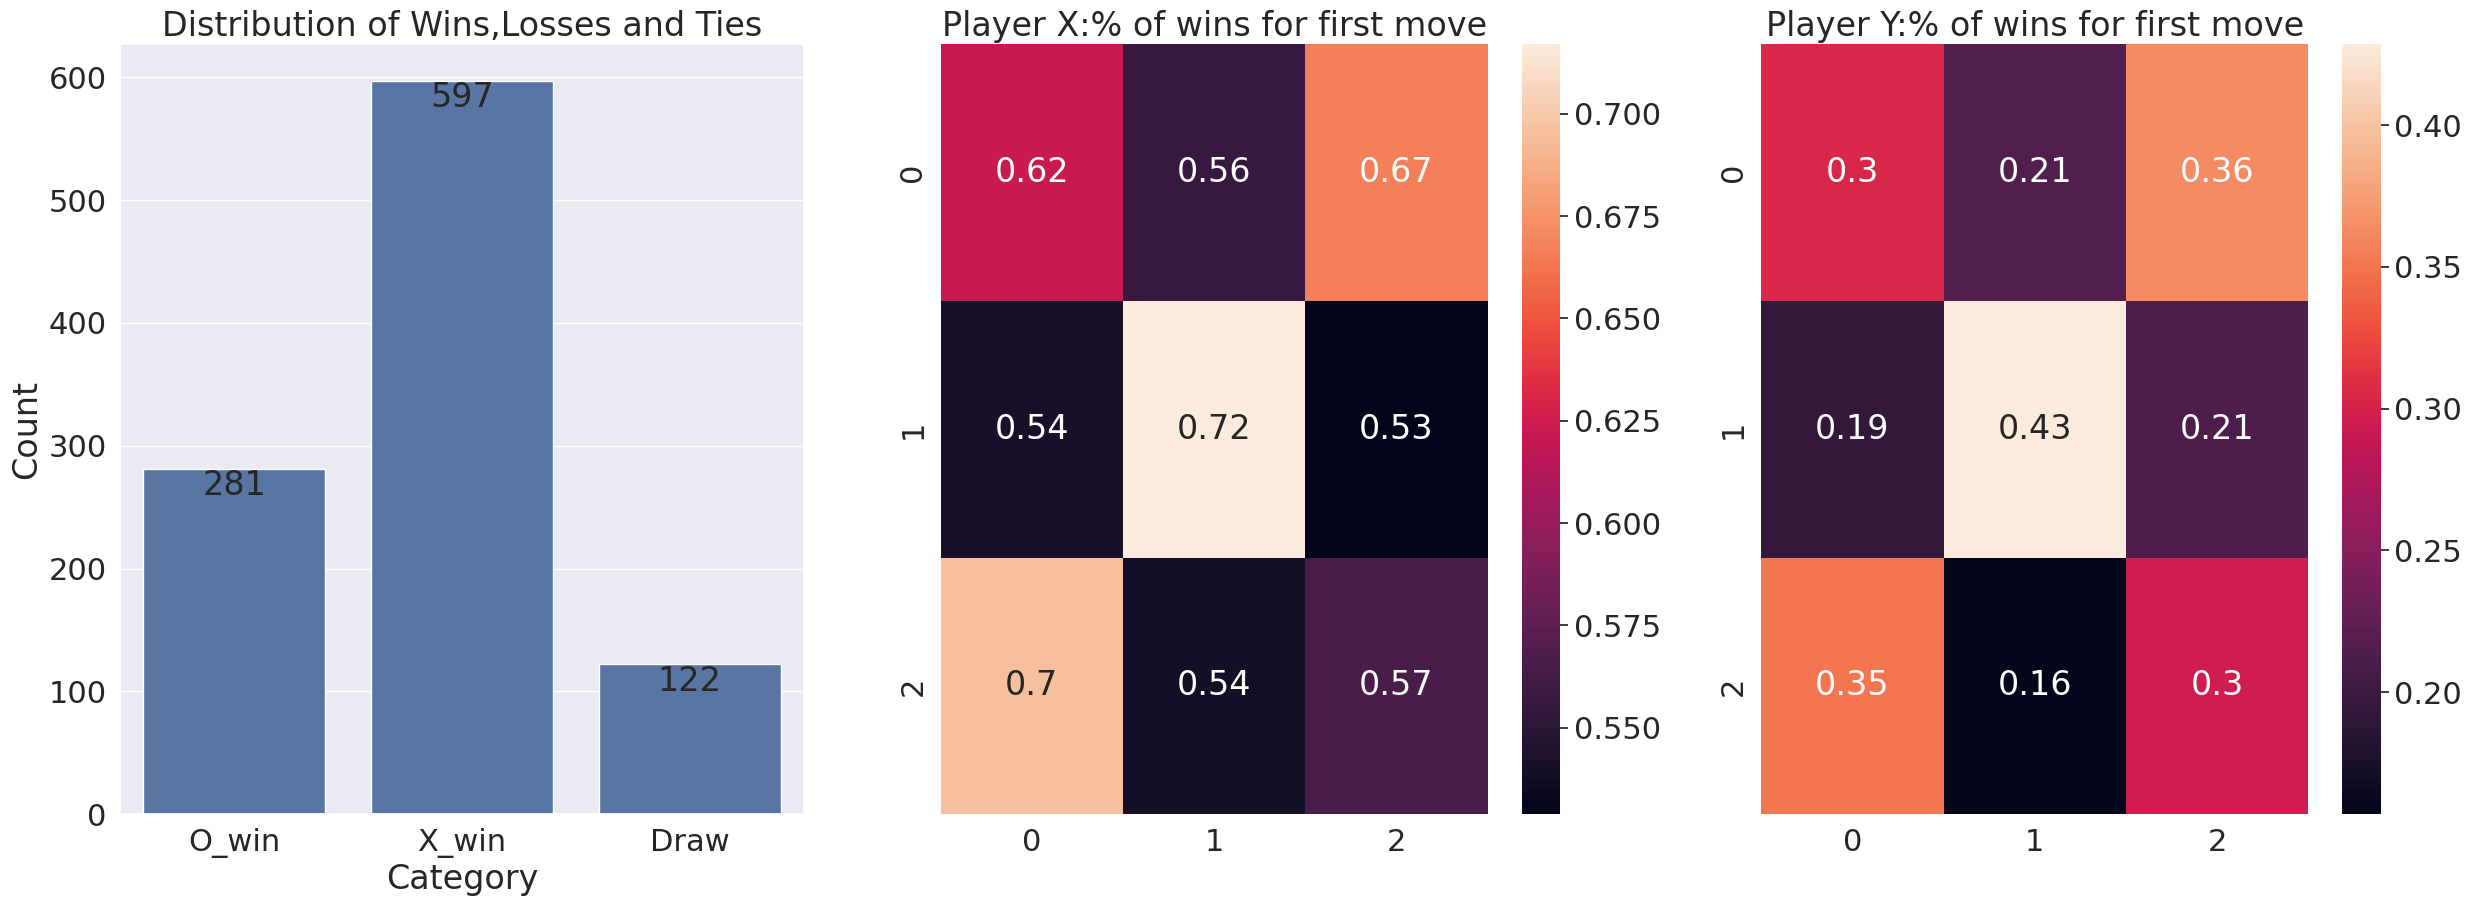

In [84]:
plot_results(results1)

We also see that given both players use random strategies: player X can play the first move in any of the squares without it affecting the win rate significantly.

For player O on the other hand, playing the first move in the central or corner square results in a significantly higher win rate.

## Optimal X vs Random O

In [85]:
results2 = play_games(1000,X_strategy=optimal_decision,O_strategy=random_decision)

100%|██████████| 1000/1000 [00:00<00:00, 11738.43it/s]


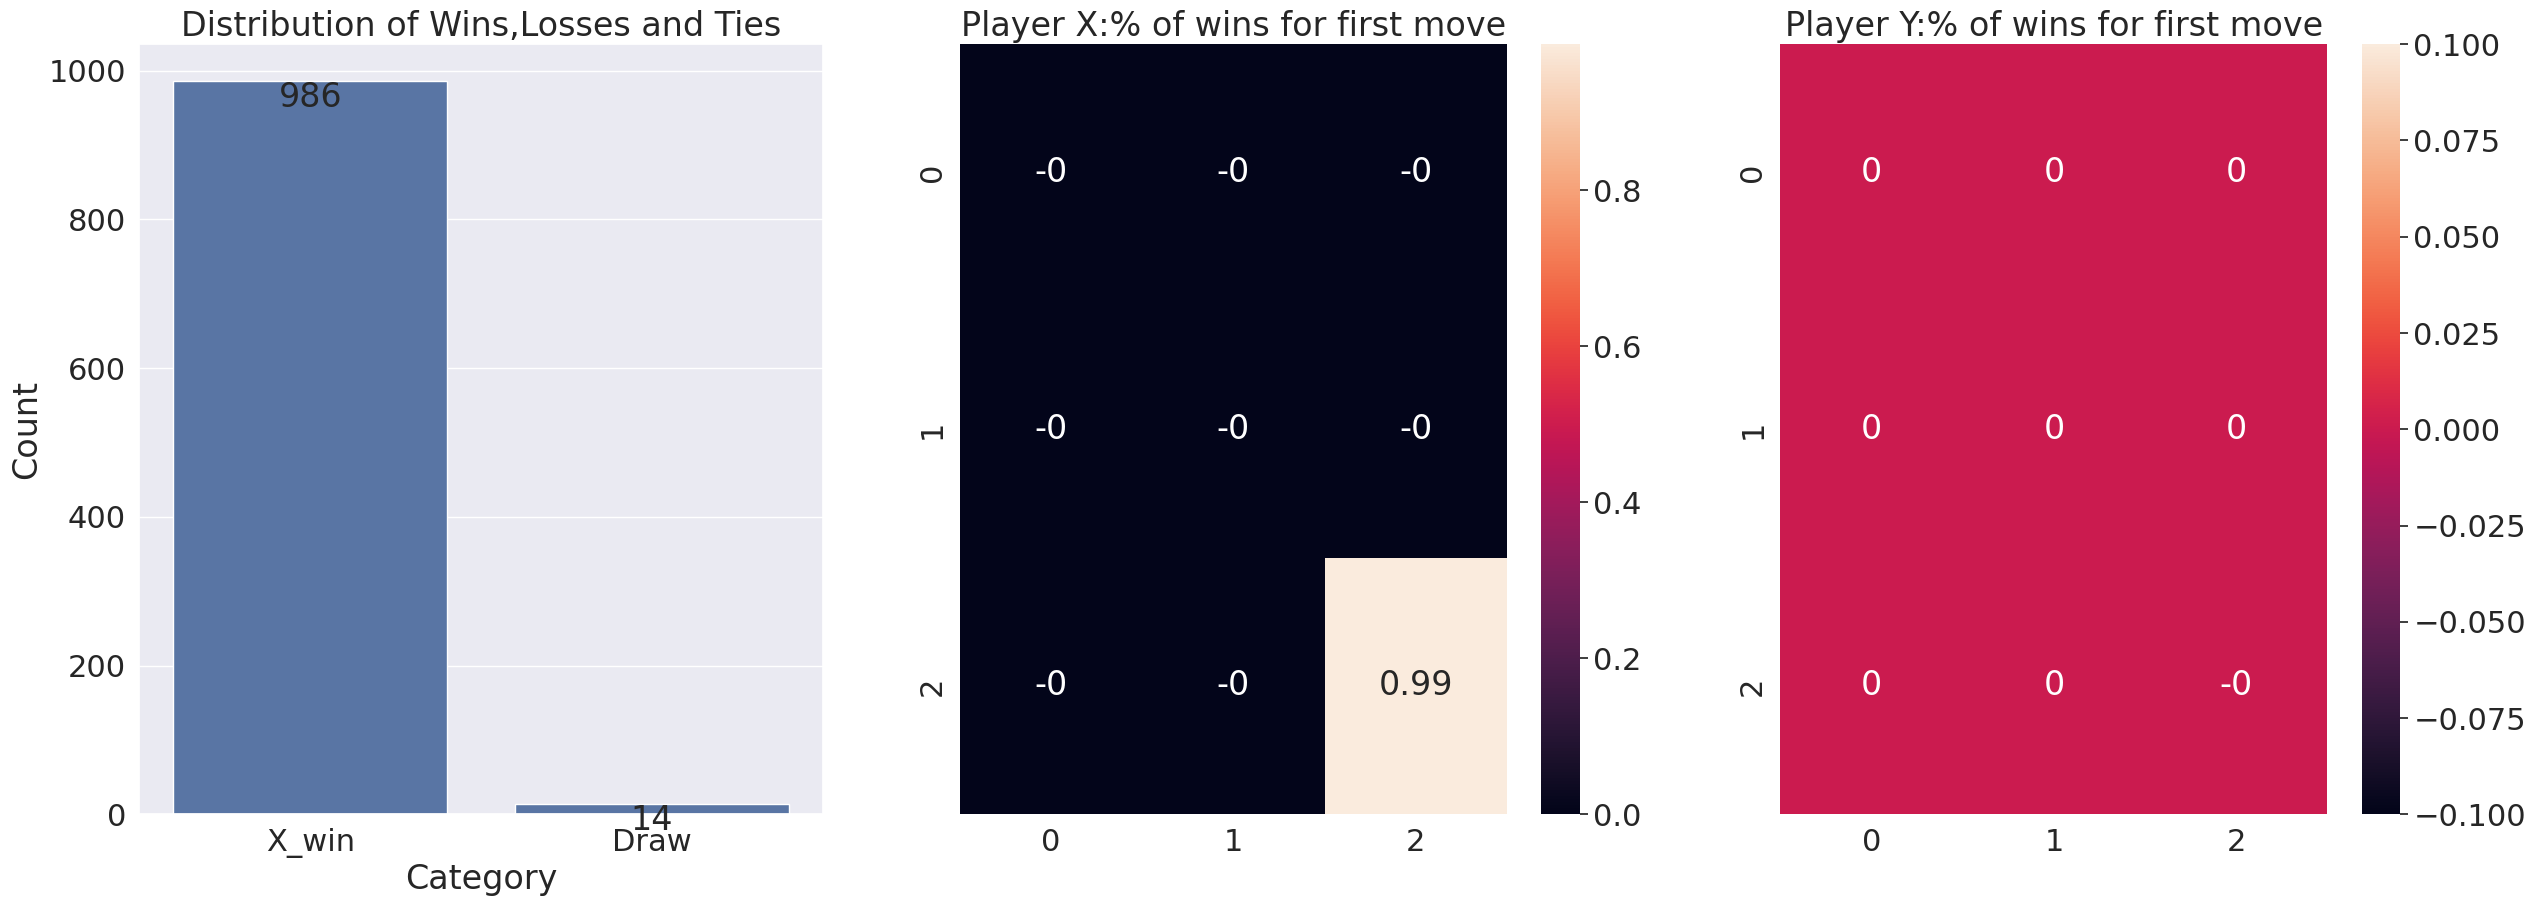

In [86]:
plot_results(results2)

When player X uses the optimal minimax strategy,it wins almost all the games.

It consistently picks the bottom right hand corner in the first move in every game.

## Random X vs Optimal O

In [87]:
results3 = play_games(1000,X_strategy=random_decision,O_strategy=optimal_decision)

100%|██████████| 1000/1000 [00:00<00:00, 46036.62it/s]


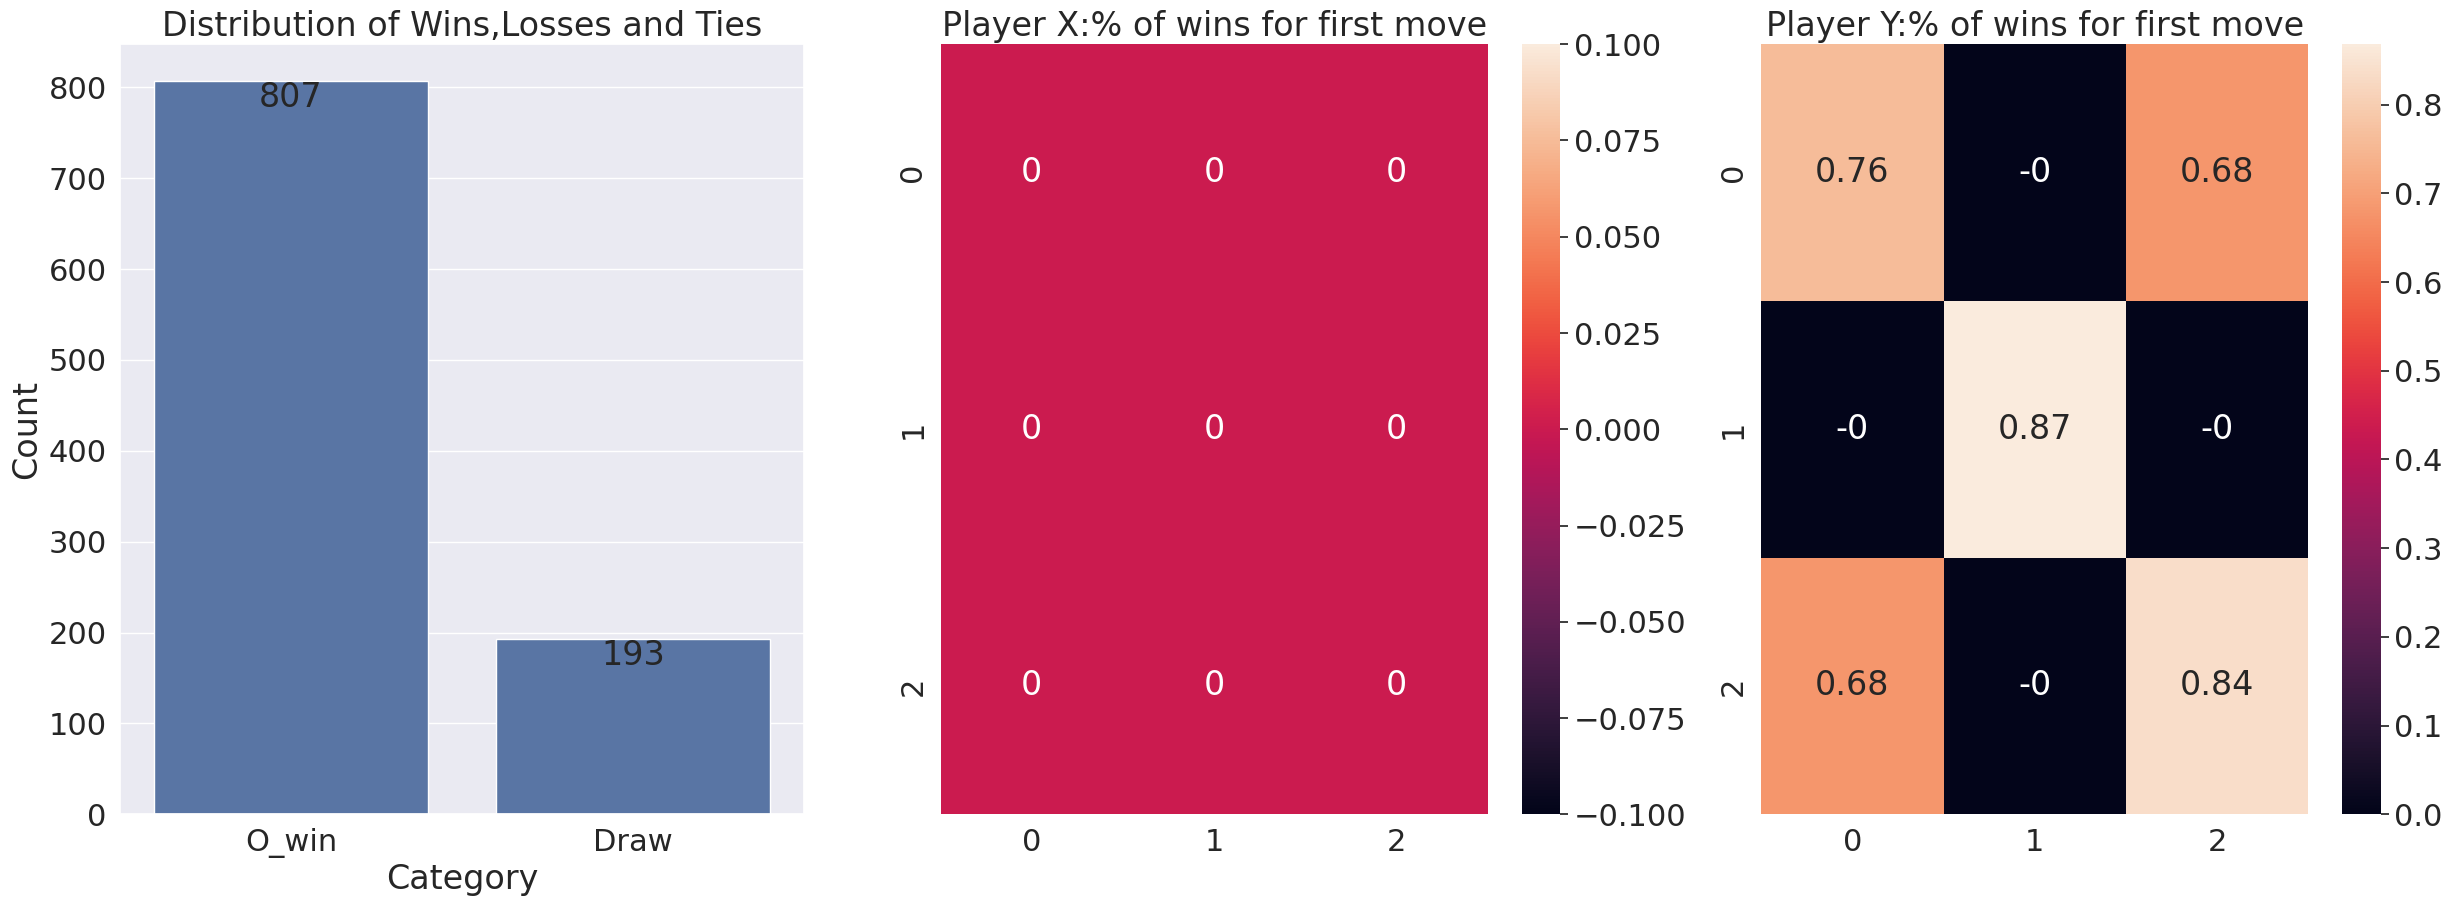

In [88]:
plot_results(results3)

In this case, O has a lower win rate given it does not have a fist movee advantage.

The win rate is highest when Player O gets to occupy the central square in the first move.

## Optimal X vs Optimal O

In [89]:
results4 = play_games(100,X_strategy=optimal_decision,O_strategy=optimal_decision)

100%|██████████| 100/100 [00:00<00:00, 35690.13it/s]


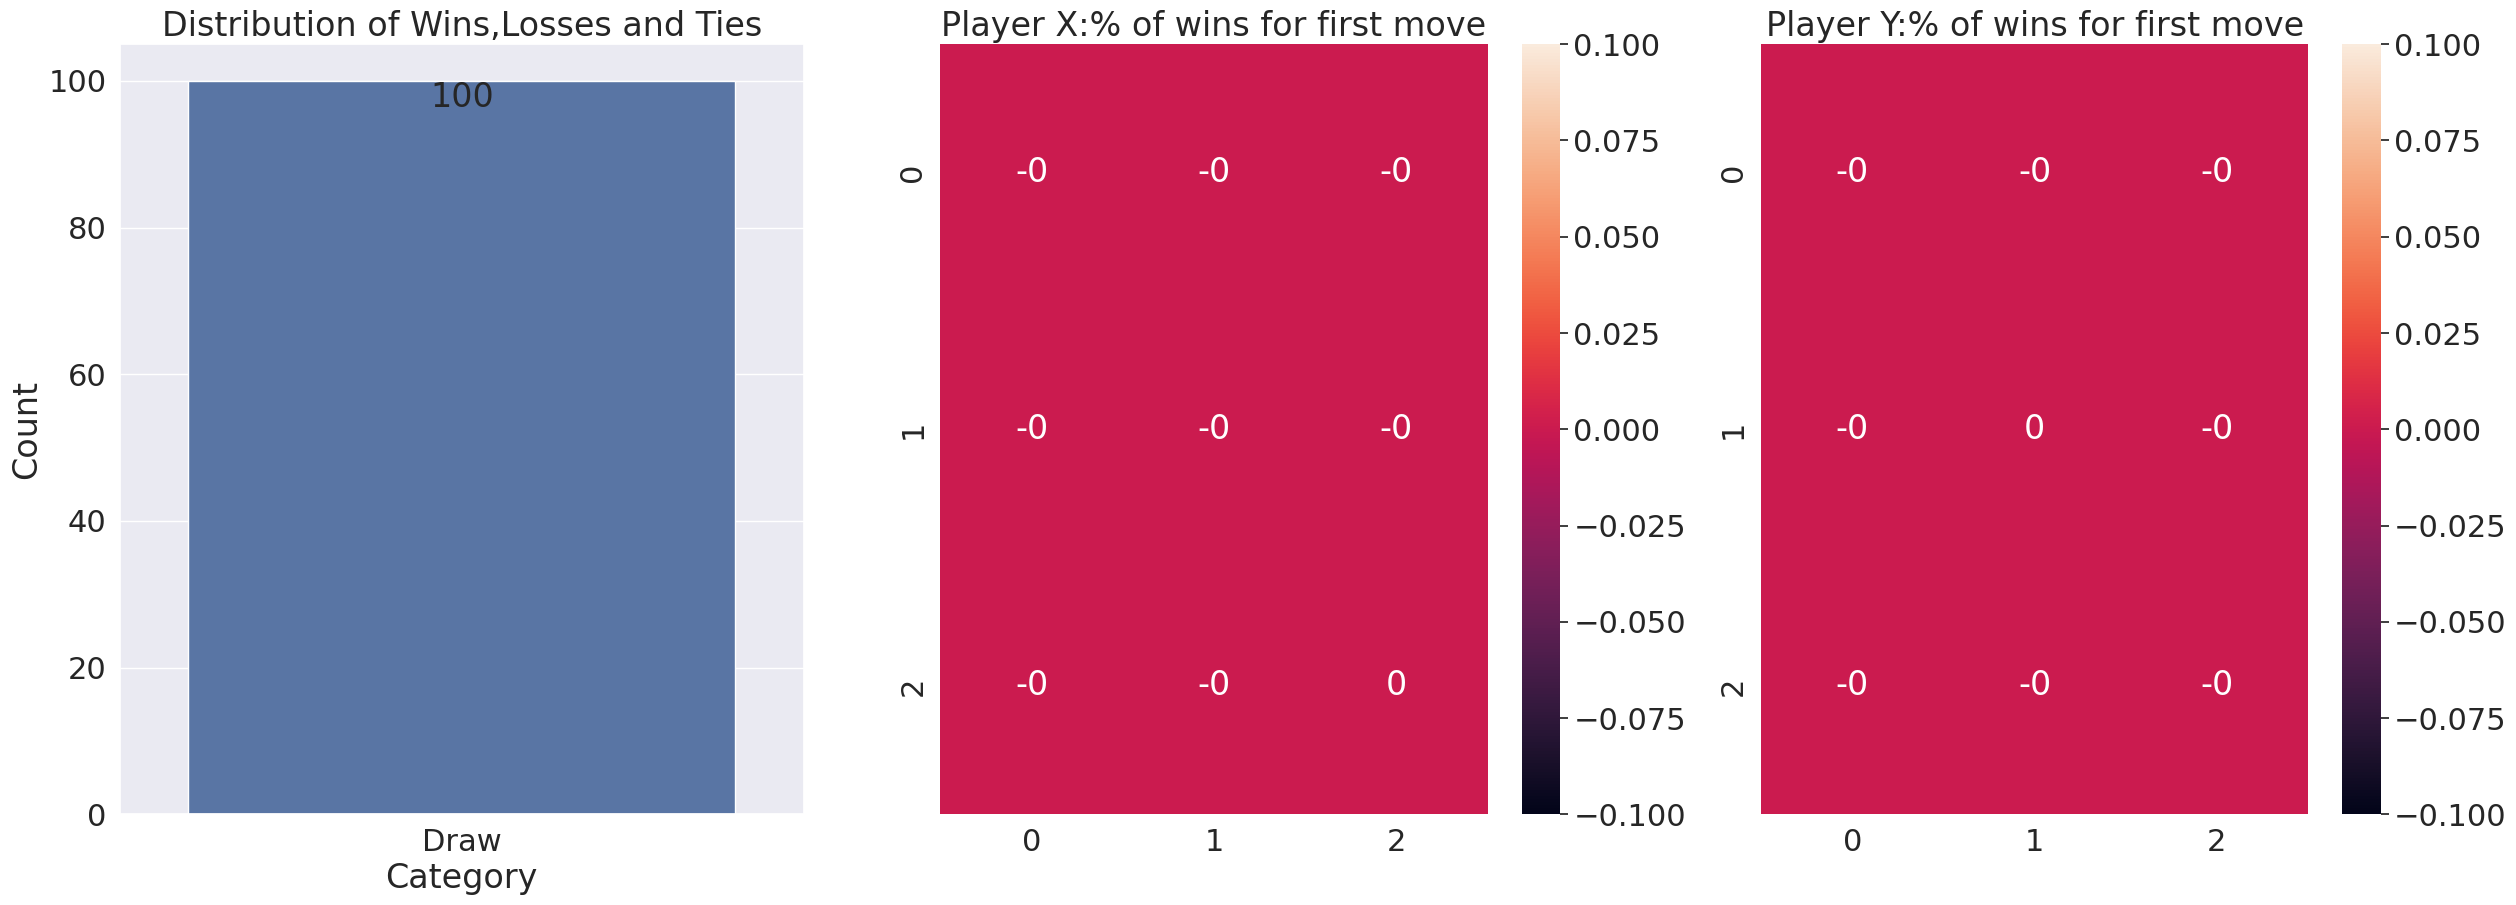

In [90]:
plot_results(results4)

When both players play the optimal strategy, all games end in ties.